## Scikit-Learn Perceptron

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris() # scikit-learn's iris dataset
X = iris.data[:, [2, 3]]  # Petal length and petal width
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Set up train test split

In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into 70% training and 30% testing, stratified by class label
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

Standardize the dataset

In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the standard scaler
sc = StandardScaler()

# Fit the scaler to the training data
sc.fit(X_train)

# Transform both training and test data using the fitted scaler
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Train Model

In [4]:
from sklearn.linear_model import Perceptron

# Create a Perceptron instance with a learning rate of 0.1
ppn = Perceptron(eta0=0.1, random_state=1)

# Train the model using the standardized training data
ppn.fit(X_train_std, y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.1
,n_jobs,None
,random_state,1


Make predictions and get accuracy

In [5]:
from sklearn.metrics import accuracy_score

# Predict test labels
y_pred = ppn.predict(X_test_std)

# Count misclassified samples
misclassified = (y_test != y_pred).sum()
print(f'Misclassified examples: {misclassified}')

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

Misclassified examples: 1
Accuracy: 0.978


Decision region visualization

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

Visualize the decision boundary of the trained model

```python

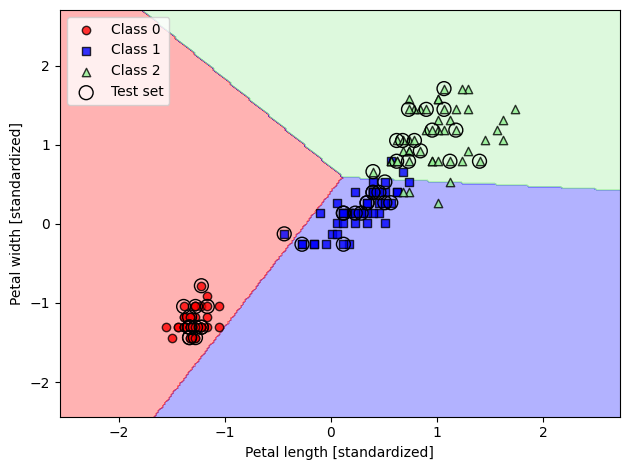

In [7]:
# Combine training and test data
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Plot decision regions
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Logistic Regression

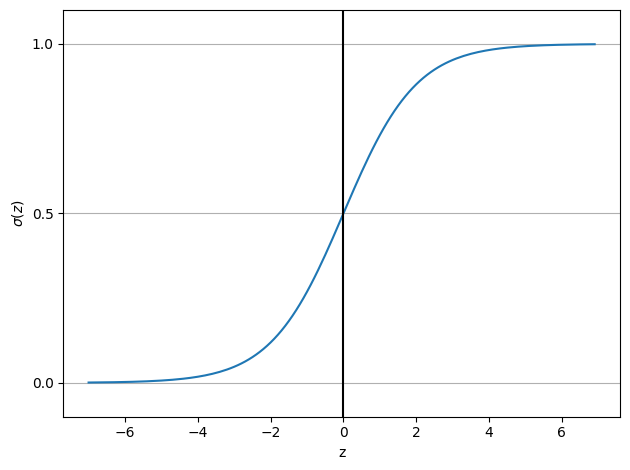

In [8]:
# plotting sigmoid function from -7 to 7
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')          # Vertical line at z=0
plt.ylim(-0.1, 1.1)                  # Y-axis limits
plt.xlabel('z')
plt.ylabel(r'$\sigma(z)$')           # LaTeX formatting for sigma(z)
plt.yticks([0.0, 0.5, 1.0])          # Y-axis ticks at 0, 0.5, and 1
ax = plt.gca()
ax.yaxis.grid(True)                  # Add horizontal grid lines
plt.tight_layout()
plt.show()

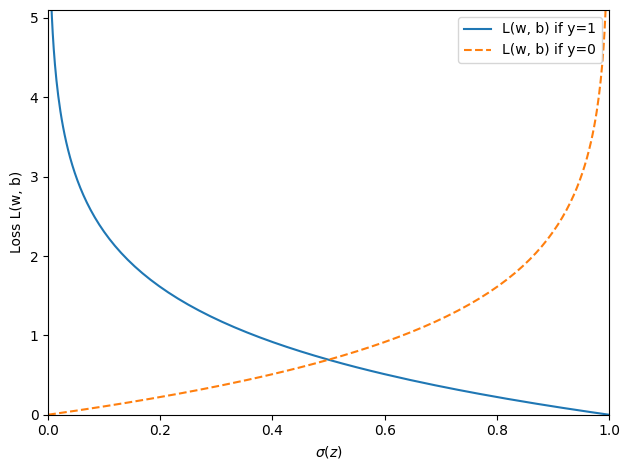

In [9]:
# graph of loss function for 0 and 1, showing that loss will increase exponentially as the prediction moves away from the true label
def loss_1(z):
    return -np.log(sigmoid(z))

def loss_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel(r'$\sigma(z)$')
plt.ylabel('Loss L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [11]:
# import logistic regression from LogisticRegression.py
from LogisticRegression import LogisticRegressionGD

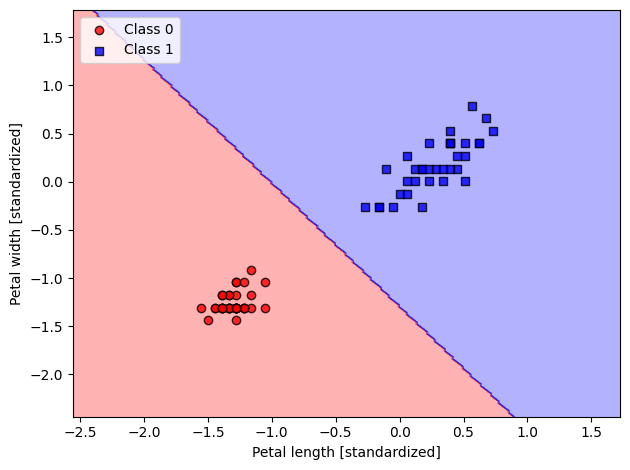

In [12]:
# Check implementation works
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3,
                            n_iter=1000,
                            random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Owner\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


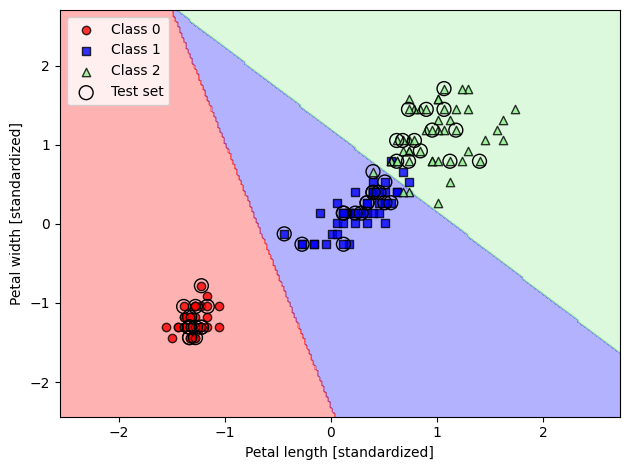

In [13]:
# instead use scikit learns model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
# using preict_proba to get probabilities, can predict the probabilities of first three examples in dataset
print(lr.predict_proba(X_test_std[:3, :]))
# can use argmax to get the class label with the highest probability
print(lr.predict_proba(X_test_std[:3, :]).argmax(axis=1))
# Alternatively, we can use the predict method to get the class labels directly
print(lr.predict(X_test_std[:3, :]))
# if you want to predict class label for one example, you have to reshape it as scikit-learn expects 2D array for data input. Thus, you can use NumPy's reshape method:
print(lr.predict(X_test_std[0, :].reshape(1, -1)))

[[6.63770505e-09 1.44747233e-01 8.55252760e-01]
 [8.34031210e-01 1.65968790e-01 3.20815954e-13]
 [8.48822884e-01 1.51177116e-01 2.57998350e-14]]
[2 0 0]
[2 0 0]
[2]


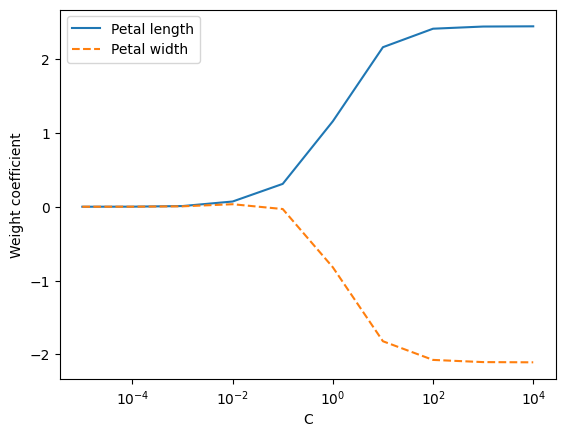

In [26]:
# Regularization to prevent overfitting and control model complexity
from sklearn.multiclass import OneVsRestClassifier
# weights, params = [], []

# for c in np.arange(-5, 5):
#     # lr = LogisticRegression(C=10.**c, multi_class='ovr')
#     # make this work
#     lr = OneVsRestClassifier(LogisticRegression(C=10.**c, solver='lbfgs'))
#     lr.fit(X_train_std, y_train)
#     # weights.append(lr.coef_[1])
#     weights.append(lr.estimators_[1].coef_[0])
#     params.append(10.**c)
    
# Initialize empty lists to store weight coefficients and corresponding regularization parameters
weights, params = [], []

# Loop over a range of exponents from -5 to 4 (for 10^c)
for c in np.arange(-5, 5):
    # Create a logistic regression model with inverse regularization strength C=10^c
    # Use One-vs-Rest strategy to handle multi-class classification explicitly
    lr = OneVsRestClassifier(LogisticRegression(C=10.**c))
    
    # Train the model on standardized training features and labels
    lr.fit(X_train_std, y_train)
    
    # Append the weight coefficients (feature importance) for the classifier that distinguishes class 1 from the rest
    # .coef_ is (1, n_features), so .coef_[0] extracts the 1D array
    weights.append(lr.estimators_[1].coef_[0])
    
    # Store the regularization parameter value for plotting
    params.append(10.**c)

weights = np.array(weights)

plt.plot(params, weights[:, 0], label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

### Explanation of `weights.append(lr.estimators_[1].coef_[0])`

- **`lr.estimators_`**  
  A list of trained binary classifiers (`LogisticRegression`), one for each class (e.g., for classes 0, 1, 2).

- **`lr.estimators_[1]`**  
  Selects the binary classifier for class **1 vs. all**.

- **`.coef_`**  
  A `(1, n_features)` array of learned weights (coefficients) for that classifier.

- **`.coef_[0]`**  
  Extracts the **1D array** of weights from the first (and only) row.

- **`weights.append(...)`**  
  Appends the weight array for **class 1** to the `weights` list for later plotting or analysis.


## Support Vector Machine (SVM)

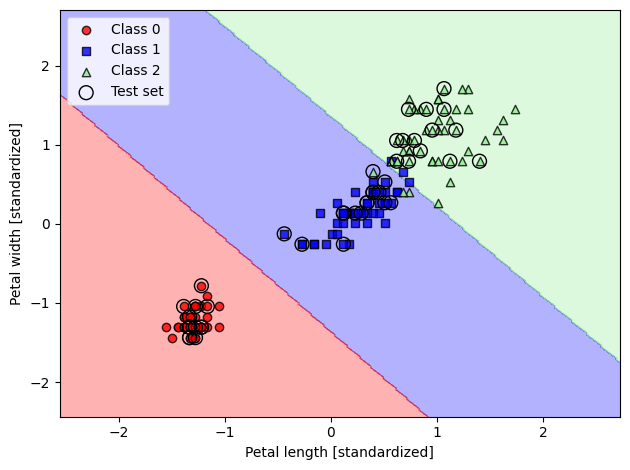

In [ ]:
# Use SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
# as you can see esp between red and blue, the SVM tries to maximize the margin between the two classes, while logistic regression tries to minimize the loss function. This is why SVM is often preferred for classification tasks with clear margins between classes.

In [ ]:
# if you want to make it support online learning, you can use the SGDClassifier from scikit-learn, which implements stochastic gradient descent for training linear classifiers. Here's how you can modify the code to use SGDClassifier:
from sklearn.linear_model import SGDClassifier
# can use any of the following loss functions
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

### Solving nonlinear problems with Kernel SVM

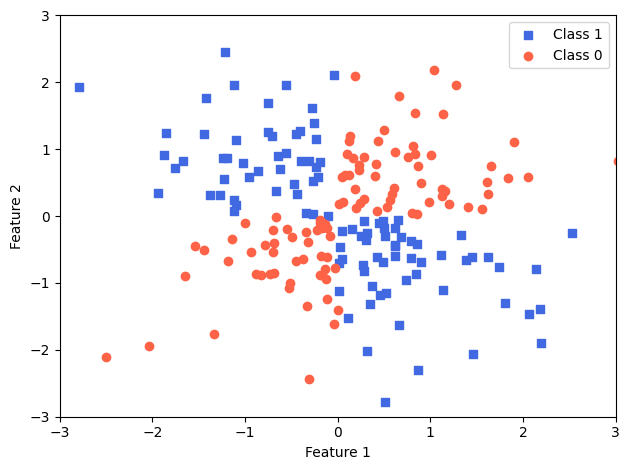

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Create a XOR dataset with random noise

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue', marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato', marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

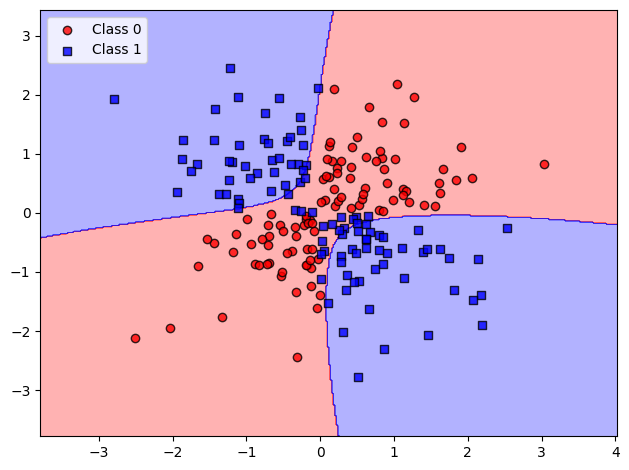

In [31]:
# Train an SVM with RBF kernel (One of the most popular kernels for SVM) on the XOR dataset and plot the decision regions.

svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

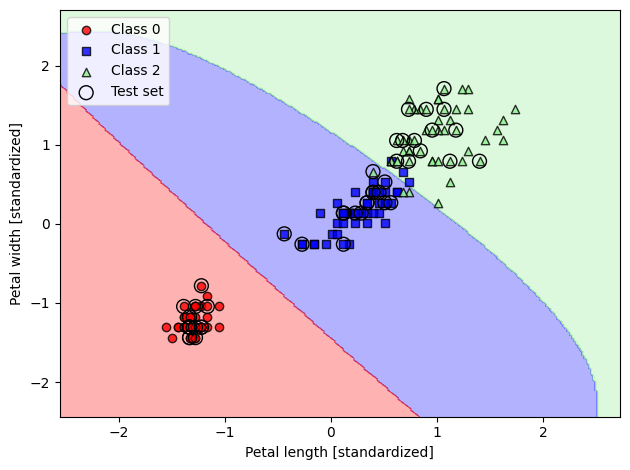

In [32]:
# Apply an RBF kernel SVM to our Iris flower dataset

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

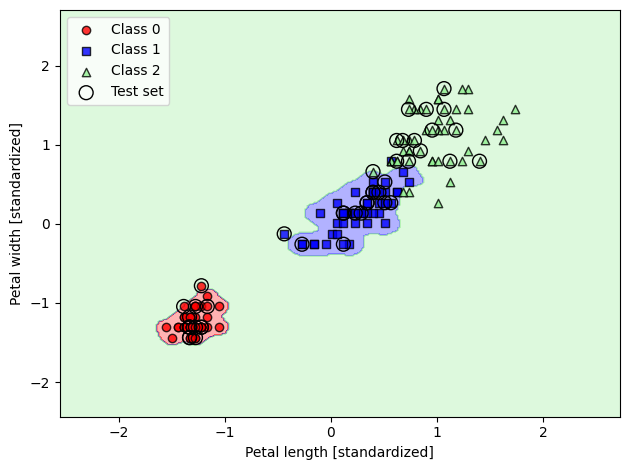

In [ ]:
# increase the gamma parameter to see how it affects the decision boundary
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show() # as you can see, the decision boundary becomes more complex and can fit the training data better, but it may also lead to overfitting if the gamma value is too high.

## Decision Tree Learning

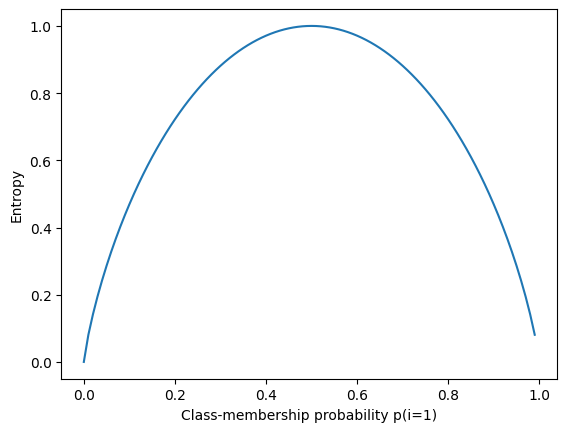

In [34]:
# Visualizing entropy
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 and p != 1 else 0 for p in x]  # Handle log(0) by setting entropy=0 at boundaries

plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.show()

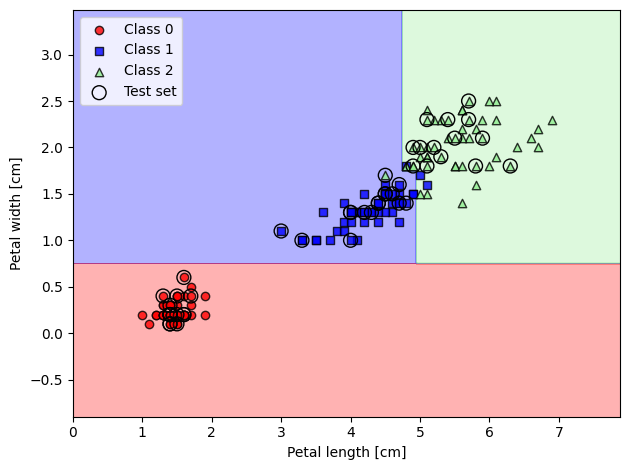

In [35]:
# Make a scikit-learn decision tree with max depth of 4 and gini impurity as the splitting criterion
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined,
                      y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

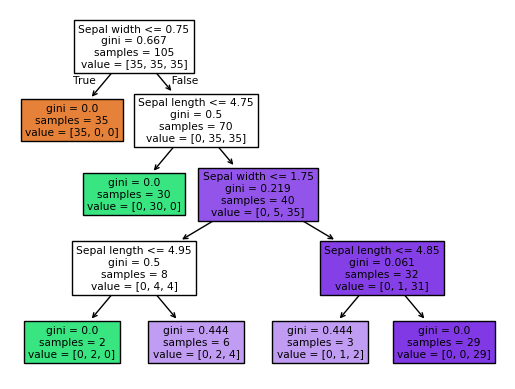

In [36]:
# visualize the decision tree
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']

tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
plt.show()

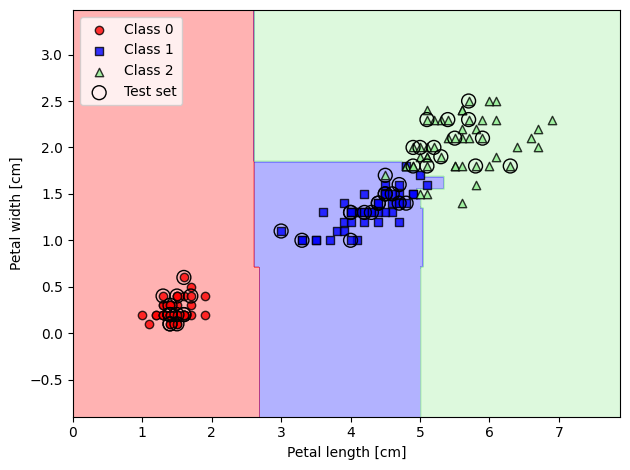

In [37]:
# Implementation of RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

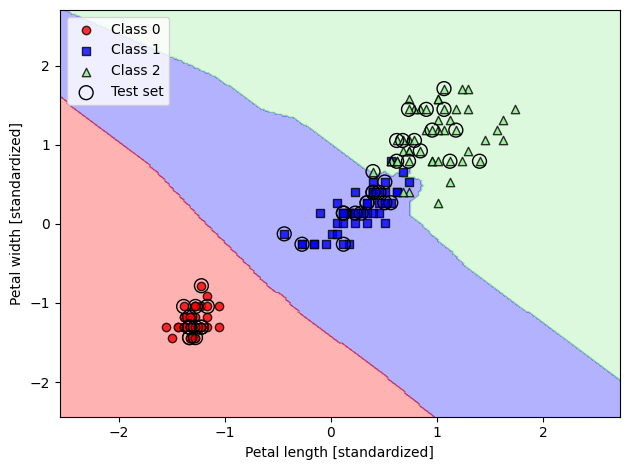

In [38]:
# Train a K-Nearest Neighbors classifier (with 5 neighbors and Euclidean distance),
# then plot decision regions including test samples.

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()